<a href="https://colab.research.google.com/github/carlosthieme/sustantiva/blob/main/Proyecto_Final_Sustantiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

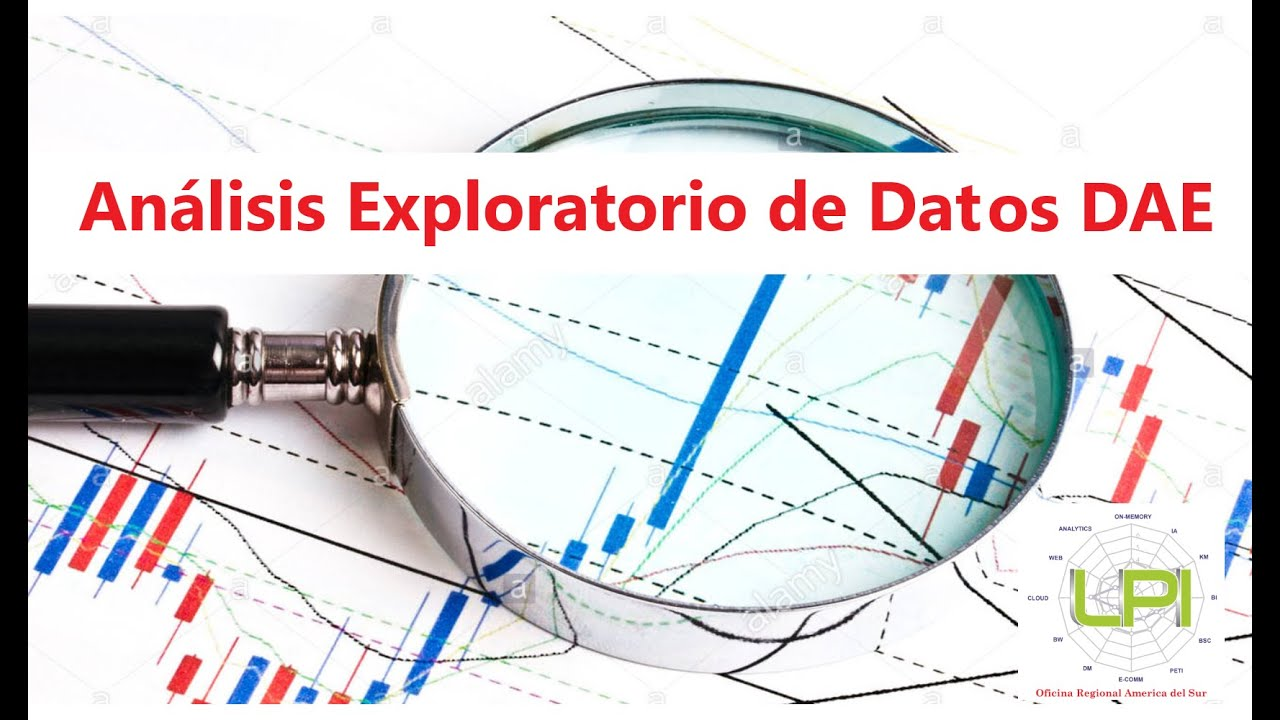

El  análisis  exploratorio  de  datos  o  (EDA,  por  sus  siglas  en  inglés)  consiste  en  comprender  los 
conjuntos  de  datos  resumiendo  sus  características  principales,  a  menudo  representándolas 
visualmente. Este paso es muy importante sobre todo cuando llegamos a modelar los datos para 
poder  aplicar  Machine  learning. El  trazado  en  EDA  consta  de  histogramas,  diagramas  de  caja, 
diagramas de dispersión y muchos más. A menudo lleva mucho tiempo explorar los datos. A través 
del proceso de EDA,  de puede pedir que se defina la declaración o definición del problema en 
nuestro conjunto de datos, lo cual es muy importante.

Se usará un conjunto de datos de autos de Kaggle. Este brinda  una breve información sobre el 
conjunto  de  datos,  el  cual  está  compuesta  de  más  de  10  000  filas  y  más  de  10  columnas  que 
contienen características del automóvil, como Tipo de combustible del motor, Tamaño del motor, 
HP, Tipo de transmisión, MPG en carretera, MPG en ciudad y muchos más.

❖ ***Importación de librerías necesarias***

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

❖ ***Carga de datos desde un archivo en disco***

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Cardataset.csv to Cardataset.csv


❖ ***Asignación de los datos del archivo a un dataframe***

In [3]:
df = pd.read_csv("Cardataset.csv")

❖ ***Se muestran los 10 primeros registros***

In [6]:
df.head(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


❖ ***Se muestran los últimos 10 registros***

In [7]:
df.tail(10)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11904,BMW,Z8,2002,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,130000
11905,BMW,Z8,2003,premium unleaded (required),394.0,8.0,MANUAL,rear wheel drive,2.0,"Exotic,Luxury,High-Performance",Compact,Convertible,19,12,3916,131500
11906,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46020
11907,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56570
11908,Acura,ZDX,2011,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50520
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


❖ ***Revisión de los tipos de datos.***
Se revisan los tipos de datos a fin de verificar que no existan valores numéricos en campos de tipo texto.

In [8]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

❖ ***Eliminar columnas innecesarias***
Se eliminarán distintas columnas que no serán ocupadas en el análisis.

In [9]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Size', 'Popularity', 'Number of Doors', 'highway MPG', 'city mpg'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Style,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Coupe,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Convertible,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Coupe,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Coupe,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Convertible,34500


❖***Renombrar Columnas.*** Se renombran las columnas para obtener una lectura mas clara de los datos y en función del idioma en que se trabajará.

In [14]:
df = df.rename(columns={"Make": "Fabricante", "Model": "Modelo", "Year": "Año","Engine HP": "HP", "Engine Cylinders": "Cilindrada", "Transmission Type": "Cambios", "Driven_Wheels": "Traccion", "Vehicle Style": "Tipo", "MSRP": "Precio" })
df.head(5)

,Fabricante,Modelo,Año,HP,Cilindrada,Cambios,Traccion,Tipo,Precio
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Coupe,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Convertible,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Coupe,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Coupe,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Convertible,34500


❖ ***Eliminar Columnas Duplicadas.*** En grandes conjuntos de datos, es muy probable que existan datos duplicados, los que afectan la validez de los análisis, por lo que es necesario revisar y eliminar aquellos duplicados.

In [20]:
df.shape

(11092, 9)

In [21]:
duplicate_rows_df = df[df.duplicated()]
print("Filas Duplicadas: ", duplicate_rows_df.shape)

Filas Duplicadas:  (0, 9)


❖ ***Contamos el numero de filas***

In [22]:
df.count()      

Fabricante    11092
Modelo        11092
Año           11092
HP            11023
Cilindrada    11062
Cambios       11092
Traccion      11092
Tipo          11092
Precio        11092
dtype: int64

❖ ***La cuenta nos muestra que hay 822 filas duplicadas, por lo que debn ser eliminadas***

In [23]:
df = df.drop_duplicates()

❖ ***Contamos otra vez el número de filas***

In [24]:
df.count()

Fabricante    11092
Modelo        11092
Año           11092
HP            11023
Cilindrada    11062
Cambios       11092
Traccion      11092
Tipo          11092
Precio        11092
dtype: int64

❖ ***Eliminar valores nulos o inexistentes.*** Los valores nulos o inexistentes se eliminarán ya que la cantidad de ellos no son relevantes en este análisis

In [25]:
print(df.isnull().sum())

Fabricante     0
Modelo         0
Año            0
HP            69
Cilindrada    30
Cambios        0
Traccion       0
Tipo           0
Precio         0
dtype: int64


❖ ***El paso anterior muestra la cantidad de valores nulos o inexistentes en 2 columnas específicas.***

❖ ***A continuación se eliminan esos valores.***


In [26]:
df = df.dropna()  

❖ ***Se cuentan nuevamente las filas***

In [27]:
df.count()

Fabricante    10994
Modelo        10994
Año           10994
HP            10994
Cilindrada    10994
Cambios       10994
Traccion      10994
Tipo          10994
Precio        10994
dtype: int64

❖ ***Verificamos que no existan valores nulos o inexistentes.***

In [28]:
print(df.isnull().sum())

Fabricante    0
Modelo        0
Año           0
HP            0
Cilindrada    0
Cambios       0
Traccion      0
Tipo          0
Precio        0
dtype: int64


❖ ***Búsqueda de valores atípicos o Outliers*** (Se utiliza el nuevo nombre de la columna)

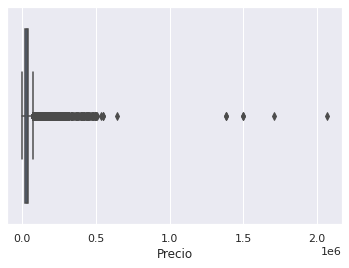

In [29]:
sns.boxplot(x=df['Precio'])

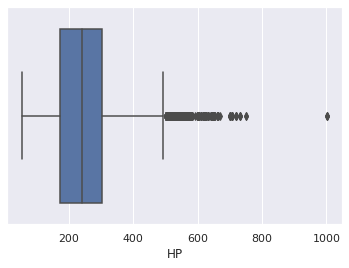

In [30]:
sns.boxplot(x=df['HP'])

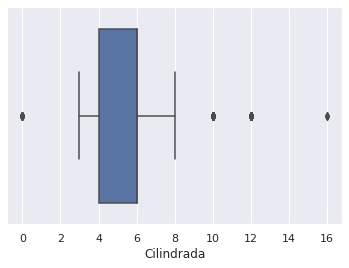

In [31]:
sns.boxplot(x=df['Cilindrada'])

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Año               9.00
HP              130.00
Cilindrada        2.00
Precio        21443.75
dtype: float64


In [36]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9548, 9)

❖ ***Se han removido los valores atípicos, aunque es posible que nos encontremos con alguno sin remover, pero en atención a la cantidad inicial, es esperable.***

❖ ***Representación gráfica de varias caracteríticas de los vehículos***

 ***HISTOGRAMA.*** Un histograma es una representación gráfica de una variable en forma de barras y nos permite ver cómo se distribuyen los valores de la variable en estudio, en este caso, la cantidad de vehículos por fabricante.

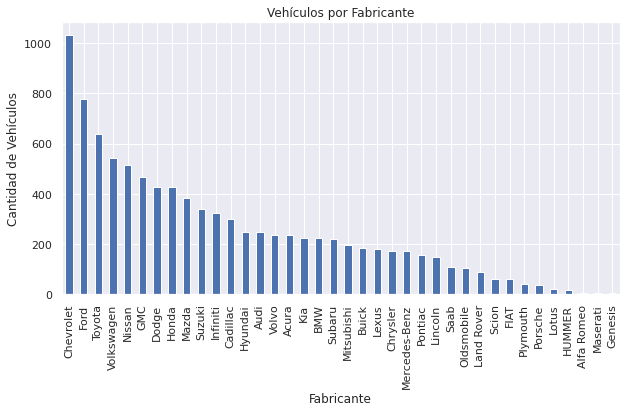

In [38]:
df.Fabricante.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Vehículos por Fabricante")
plt.ylabel('Cantidad de Vehículos')
plt.xlabel('Fabricante');

***GRÁFICO DE DISPERSIÓN (SCATTERPLOT).*** Los gráficos de dispersión se usan para averiguar la intensidad de la relación entre dos variables numéricas. El eje **X** representa la variable independiente, mientras que el eje **Y** representa la variable dependiente. De este modo, permite estudiar las relaciones que existen entre dos factores, problemas o causas relacionadas con la calidad, o un problema de calidad y su posible causa. En este caso, se utlizará la relación entre los "caballos de fuerza"(HP) y el precio.

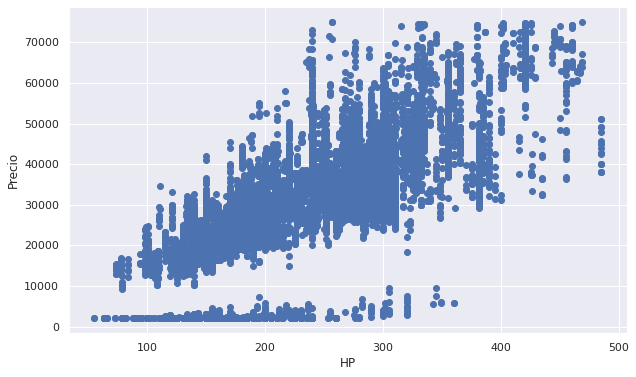

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Precio'])
ax.set_xlabel('HP')
ax.set_ylabel('Precio')
plt.show()